In [101]:
from PIL import Image
import os
import pandas as pd
import pylab as pl
import numpy as np
import matplotlib
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import FactorAnalysis
from sklearn.datasets import load_digits


In [102]:
def load_images(img_dir, grayscale=False):
    """Loads images from within a specified directory.

    Args:
      img_dir (str): The directory from which to load (.jpg) images.
      grayscale (bool): Whether to convert the image into grayscale. Defaults to False.

    Returns:
      images: An array of image objects loaded from the specified directory

    """
    images = []

    for file in os.listdir(img_dir):
        if file.endswith(".jpg"):
            im = Image.open(os.path.join(img_dir, file))

            im = im.resize((100, 100))

            if grayscale:
                im = np.array(im, dtype=np.float64) / 255

                # Convert image to grayscale
                r, g, b = im[:,:,0], im[:,:,1], im[:,:,2]
                gray = 0.2989*r + 0.5870*g + 0.1140*b
                im = gray.reshape((1, -1))[0]

            images.append(im)

    return images

def plot_image_space(images, X, title="Projection of the Images into 2 Dimensions"):
    """Generates and shows a plot of images in a feature space.

    A figure with one plot is generated. The plot displays the location of each image in 
    relation to the image's feature values in the input feature space (X).

    Args:
      images (Image): An image.
      images (SciPy array): An array of SSQs, one computed for each k.

    """
    # min-max normalization    
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    # Create a figure
    pl.figure(figsize=(16, 5))
    ax = pl.subplot(111)
    #ax.axis('off')

    # Generate picture thumbnails in the plot
    if hasattr(matplotlib.offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        for i in range(len(images)):
            imagebox = matplotlib.offsetbox.OffsetImage(images[i], zoom=.65)
            ab = matplotlib.offsetbox.AnnotationBbox(imagebox, X[i][0:2])                                  
            ax.add_artist(ab)

    # Add figure labels and ticks
    pl.title(title, fontsize=16)
    pl.xticks([]), pl.yticks([])

    # Add figure bounds
    pl.ylim((np.min(X, axis=0)[1])-0.25,(np.max(X, axis=0)[1])+0.25)
    pl.xlim((np.min(X, axis=0)[0])-0.1,(np.max(X, axis=0)[0])+0.1)

In [103]:
img_dir = os.path.join(os.getcwd(), "images") # directory path
images = load_images(img_dir) # load images in the specified directory

In [104]:
X = pd.DataFrame([im.histogram() for im in images])






'\nPart 2:\n\nIn terms of what this means for our image above, images that are closer together have more similarities in the rgb\nvalues that they originally had. If the two images are further apart, then this means that the two images had less\nin common with on another. For example, my image shows and groups all of the white, snowy pictures far away from the\nvery vibrant colors that we see in the sunset images or the autumn leaves. This simplicity can cause problems, however.\nIn this case, the algorithm will group autmn leaves close to pictures of sunsets since they are considered similar when\nwe reduce that number of features.  \n'

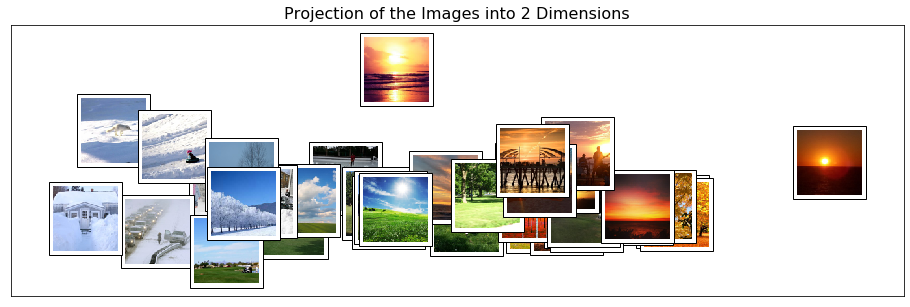

In [105]:
pca = PCA(n_components=2)
pca.fit(X)
x_pca = pca.transform(X)
plot_image_space(images, x_pca)

'''
Part 2:

In terms of what this means for our image above, images that are closer together have more similarities in the rgb
values that they originally had. If the two images are further apart, then this means that the two images had less
in common with on another. For example, my image shows and groups all of the white, snowy pictures far away from the
very vibrant colors that we see in the sunset images or the autumn leaves. This simplicity can cause problems, however.
In this case, the algorithm will group autmn leaves close to pictures of sunsets since they are considered similar when
we reduce that number of features.  
'''








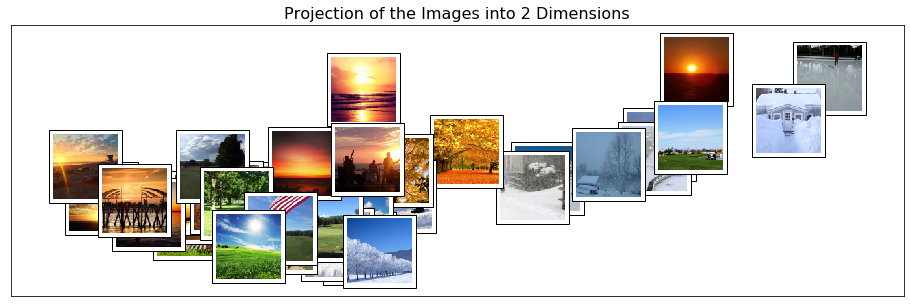

In [106]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

kmeans.fit(X)
X_two = kmeans.transform(X)
plot_image_space(images, X_two)



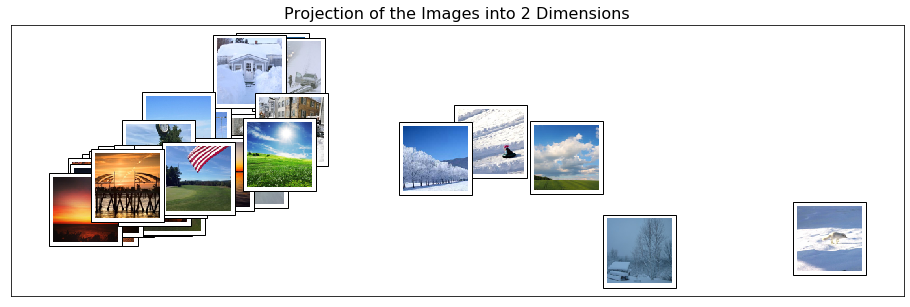

In [107]:
transformer = FactorAnalysis(n_components=2, random_state=0)
x_transformed = transformer.fit_transform(X)
plot_image_space(images, x_transformed)

